In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
train.head()
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('../input/digit-recognizer/test.csv')
test.head()
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.shape

(42000, 785)

In [5]:
test.shape

(28000, 784)

In [6]:
x = train.drop(['label'],axis=1)
X = np.array(x).reshape(len(train),28*28) / 255
X.shape

(42000, 784)

In [7]:
y = train['label']
y.shape

(42000,)

In [8]:
#t= test.drop(['label'],axis=1)
x_test = np.array(test).reshape(len(test),28*28) / 255
x_test.shape

(28000, 784)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.15,random_state=42)

In [11]:
X_train.shape, y_train.shape

((35700, 784), (35700,))

In [12]:
X_val.shape, y_val.shape

((6300, 784), (6300,))

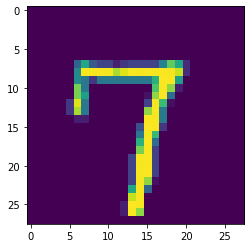

In [13]:
plt.imshow(X[6].reshape(28,28))

In [14]:
y[6]

7

## Simple neural network with no hidden layers

In [15]:
ann =keras.Sequential([
     keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])
ann.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1116/1116 [==============================] - 2s 1ms/step - loss: 0.8818 - accuracy: 0.7609
Epoch 2/5
1116/1116 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.9078
Epoch 3/5
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2939 - accuracy: 0.9188
Epoch 4/5
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2803 - accuracy: 0.9236
Epoch 5/5
1116/1116 [==============================] - 1s 1ms/step - loss: 0.2695 - accuracy: 0.9257


In [16]:
ann.evaluate(X_val,y_val)

197/197 [==============================] - 0s 899us/step - loss: 0.2913 - accuracy: 0.9183


[0.29127779603004456, 0.9182539582252502]

In [17]:
y_predict = ann.predict(X_val)

In [18]:
y_predict

array([[8.7869167e-04, 1.3228294e-01, 5.5466312e-01, ..., 1.5652180e-03,
        9.5345289e-01, 1.8181801e-02],
       [1.0123551e-03, 9.9539763e-01, 5.7610381e-01, ..., 1.9592434e-01,
        6.0940564e-01, 1.4319098e-01],
       [9.7022450e-05, 3.0952692e-04, 3.8185716e-04, ..., 8.2695138e-01,
        1.9822922e-01, 9.9338800e-01],
       ...,
       [1.0378450e-02, 2.4330409e-06, 5.2461088e-02, ..., 2.0647347e-03,
        9.2747211e-03, 7.9056621e-04],
       [7.6745242e-02, 4.9233437e-03, 2.3362339e-03, ..., 7.8695118e-03,
        5.9045506e-01, 1.2612045e-03],
       [9.9997753e-01, 8.7544700e-09, 1.7457962e-02, ..., 8.4931555e-05,
        2.6630044e-01, 2.0527840e-04]], dtype=float32)

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[0]

8

Text(51.0, 0.5, 'Truth')

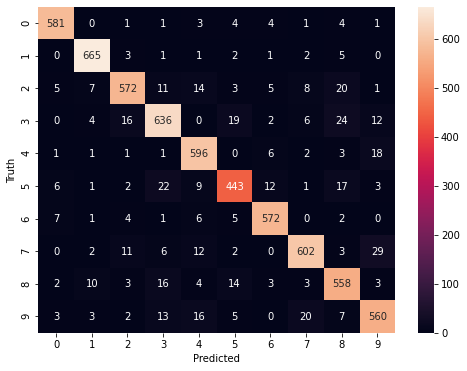

In [20]:
cn = tf.math.confusion_matrix(y_val,y_predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [21]:
ann_hidden =keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
ann_hidden.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_hidden.fit(X_train,y_train,epochs=5)

Epoch 1/5
1116/1116 [==============================] - 2s 2ms/step - loss: 0.5477 - accuracy: 0.8473
Epoch 2/5
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1637 - accuracy: 0.9524
Epoch 3/5
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1044 - accuracy: 0.9693
Epoch 4/5
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0848 - accuracy: 0.9753
Epoch 5/5
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0616 - accuracy: 0.9828


In [22]:
ann_hidden.evaluate(X_val,y_val)

197/197 [==============================] - 0s 1ms/step - loss: 0.1103 - accuracy: 0.9649


[0.11031858623027802, 0.9649206399917603]

In [23]:
y_predict = ann_hidden.predict(X_val)
y_predict

array([[1.9612193e-02, 1.0600972e-01, 8.4454250e-01, ..., 4.3491423e-03,
        9.9991566e-01, 3.1508356e-02],
       [5.7539344e-04, 9.9545312e-01, 1.3644162e-01, ..., 5.7873166e-01,
        2.7385372e-01, 9.9919140e-03],
       [8.2826614e-04, 1.1769831e-03, 9.1098795e-05, ..., 7.2984976e-01,
        4.0979892e-02, 9.9902904e-01],
       ...,
       [3.8569564e-01, 5.1159550e-06, 2.8351903e-02, ..., 1.0714889e-02,
        1.5992412e-01, 7.3936284e-03],
       [1.7229754e-01, 3.9506257e-03, 1.4928877e-03, ..., 3.4989357e-02,
        7.9992890e-01, 8.9070201e-04],
       [9.9999762e-01, 3.4384866e-05, 1.4880925e-01, ..., 3.5994649e-02,
        3.5544494e-01, 8.6721778e-03]], dtype=float32)

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[2]

9

Text(51.0, 0.5, 'Truth')

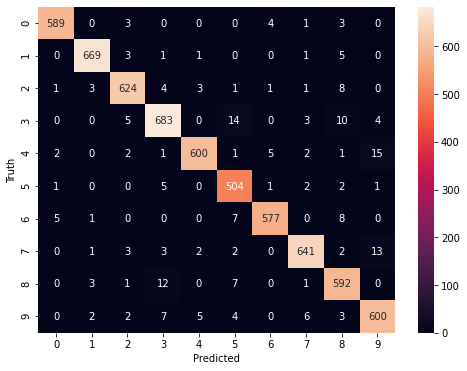

In [25]:
cn = tf.math.confusion_matrix(y_val,y_predicted_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cn, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten Layer

In [26]:
ann_flat = keras.Sequential([
           keras.layers.Flatten(input_shape=(28,28)),
           keras.layers.Dense(100, activation='relu'),
           keras.layers.Dense(10, activation='sigmoid')
])
ann_flat.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann_flat.fit(X_train,y_train,epochs=10)

Epoch 1/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.8462
Epoch 2/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1650 - accuracy: 0.9515
Epoch 3/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.1089 - accuracy: 0.9680
Epoch 4/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0801 - accuracy: 0.9765
Epoch 5/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0593 - accuracy: 0.9829
Epoch 6/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0515 - accuracy: 0.9838
Epoch 7/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0321 - accuracy: 0.9916
Epoch 8/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0302 - accuracy: 0.9913
Epoch 9/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.0201 - accuracy: 0.9951
Epoch 10/10
1116/1116 [==============================] - 2s 2ms/step - loss: 0.018

In [27]:
ann_flat.evaluate(X_val,y_val)

197/197 [==============================] - 0s 1ms/step - loss: 0.1314 - accuracy: 0.9643


[0.13135890662670135, 0.9642857313156128]

In [28]:
y_predict = ann_hidden.predict(x_test)
y_predict

array([[3.1112820e-02, 2.0326792e-05, 9.9999964e-01, ..., 1.7701089e-02,
        1.2921959e-02, 3.2131014e-05],
       [9.9983847e-01, 2.5114417e-04, 1.6389126e-01, ..., 4.1318327e-02,
        1.6639590e-02, 9.1779232e-04],
       [3.2514036e-03, 6.0187697e-02, 4.2137980e-02, ..., 1.1383286e-01,
        4.0360433e-01, 9.6855950e-01],
       ...,
       [8.7186694e-04, 1.2628198e-02, 1.7306250e-01, ..., 2.0673275e-03,
        4.0300390e-01, 4.5419785e-01],
       [3.3381879e-03, 2.6688529e-05, 1.1383593e-03, ..., 5.9463441e-02,
        1.0354489e-02, 9.9977124e-01],
       [8.0904454e-02, 3.7260056e-03, 9.9999785e-01, ..., 1.4919043e-04,
        1.1362970e-02, 7.7289343e-04]], dtype=float32)

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[2]

9

## Using CNN

In [31]:
cnn = keras.Sequential([
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [33]:
cnn.compile(
             optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(35700, 28, 28, 1)

In [35]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(28000, 28, 28, 1)

In [36]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1116/1116 [==============================] - 12s 10ms/step - loss: 0.4175 - accuracy: 0.8706
Epoch 2/10
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0807 - accuracy: 0.9759
Epoch 3/10
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0467 - accuracy: 0.9856
Epoch 4/10
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0322 - accuracy: 0.9898
Epoch 5/10
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0224 - accuracy: 0.9926
Epoch 6/10
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0173 - accuracy: 0.9949
Epoch 7/10
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0125 - accuracy: 0.9963
Epoch 8/10
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0076 - accuracy: 0.9977
Epoch 9/10
1116/1116 [==============================] - 11s 10ms/step - loss: 0.0059 - accuracy: 0.9981
Epoch 10/10
1116/1116 [==============================] - 11s 10m

In [37]:
y_predict_final = cnn.predict(x_test)

In [38]:
y_predicted_labels_final =[np.argmax(i) for i in y_predict_final]

In [39]:
image_id = range(1, y_predict_final.shape[0] + 1)
submissions = pd.DataFrame({'ImageId':image_id, 'Label':y_predicted_labels_final})
submissions.to_csv('digit_recognizer_submission_final',index=False)

In [40]:
submissions.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
